## 군집 알고리즘의 비교와 평가

In [39]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import mglearn
import numpy as np
from sklearn.preprocessing import StandardScaler    # 표준화
from sklearn.metrics.cluster import adjusted_rand_score

### 한글
import matplotlib
from matplotlib import font_manager, rc
font_loc = "C:/Windows/Fonts/malgunbd.ttf"
font_name = font_manager.FontProperties(fname=font_loc).get_name()
matplotlib.rc('font', family=font_name)

In [58]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
print(X[1:15], y[1:15])
print(np.mean(X))
print(np.std(X))

[[ 1.61859642 -0.37982927]
 [-0.02126953  0.27372826]
 [-1.02181041 -0.07543984]
 [ 1.76654633 -0.17069874]
 [ 1.8820287  -0.04238449]
 [ 0.97481551  0.20999374]
 [ 0.88798782 -0.48936735]
 [ 0.89865156  0.36637762]
 [ 1.11638974 -0.53460385]
 [-0.36380036  0.82790185]
 [ 0.24702417 -0.23856676]
 [ 1.81658658 -0.13088387]
 [ 1.2163905  -0.40685761]
 [-0.8236696   0.64235178]] [1 1 0 1 1 0 1 0 1 0 1 1 1 0]
0.37434879176820846
0.7188000865361358


### 평균이 0, 분산이 1이 되도록 데이터의 스케일을 조정

In [41]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled[1:15]
print(X_scaled.shape)
print(np.std(X), np.std(X_scaled))
print(np.var(X), np.var(X_scaled))
print(np.mean(X[:,0]), np.mean(X_scaled[:,0]))
print(np.mean(X[:,1]), np.mean(X_scaled[:,1]))

(200, 2)
0.7188000865361358 1.0
0.5166735644043563 1.0
0.4964808628141405 1.1990408665951691e-16
0.25221672072227647 -1.5987211554602254e-16


### 그래프로 값을 확인해 보기

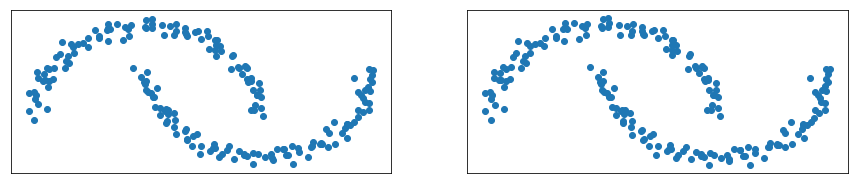

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(15,3),
                        subplot_kw = {'xticks':(), 'yticks':()})

# 무작위로 할당한 클러스터를 그린다.
axes[0].scatter(X[:,0], X[:,1])

# 무작위로 할당한 클러스터를 그린다.
axes[1].scatter(X_scaled[:,0], X_scaled[:,1])

In [42]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [45]:
# 사용할 알고리즘 모델의 리스트를 만들기
algorithms = [KMeans(n_clusters=2), 
              AgglomerativeClustering(n_clusters=2),
              DBSCAN()]

# 비교를 위해 무작위로 클러스터를 할당
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

random_clusters

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0])

Text(0.5,1,'무작위 할당 - ARI:0.00')

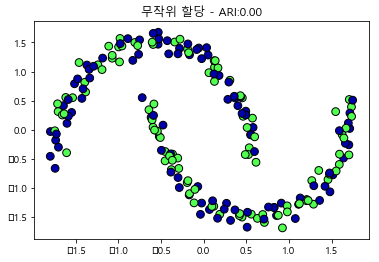

In [50]:
# 무작위로 할당한 클러스터를 그린다.
print(mglearn.cm3)
plt.scatter(X_scaled[:,0], 
                X_scaled[:,1], 
                c=random_clusters,       
                cmap=mglearn.cm3, 
                s=60,                    # 점 크기
                edgecolors='black')

plt.title("무작위 할당 - ARI:{:.2f}".format(adjusted_rand_score(y, random_clusters)))

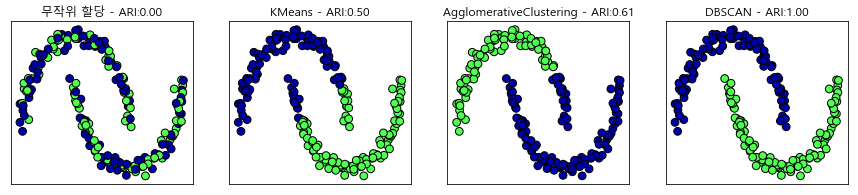

In [55]:
fig, axes = plt.subplots(1, 4, figsize=(15,3),
                        subplot_kw = {'xticks':(), 'yticks':()})

# 무작위로 할당한 클러스터를 그린다.
axes[0].scatter(X_scaled[:,0], 
                X_scaled[:,1], 
                c=random_clusters,       
                cmap=mglearn.cm3, 
                s=60,                    # 점 크기
                edgecolors='black')

axes[0].set_title("무작위 할당 - ARI:{:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # 클러스터 할당과 클러스터 중심을 그린다.
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters,
               cmap=mglearn.cm3,
               s=60, edgecolors='black')
    ax.set_title("{} - ARI:{:.2f}".format(algorithm.__class__.__name__,
                                               adjusted_rand_score(y, clusters)))


### 확인
<pre>
클러스터를 무작위 할당했을 때는 ARI 점수는 0이다.
DBSCAN은 완벽하게 군집을 만들어냈으므로) 점수가 1이다.

실수할 수 있는 것 주의***
adjusted_rand_score나 normalized_mutual_info_score 같은 군집용 측정도구를 사용하지 않고,
accuracy_score를 사용하는 것이다. 정확도를 사용하면 할당된 클러스터의 레이블 이름이 실제
레이블과 맞는지 확인한다.

그러나 클러스터 레이블은 그 자체로 의미가 있는 것이 아니며 포인트들이 같은 클러스터에 속해
있는가만이 중요하다.
</pre>

In [57]:
### 실제 예
from sklearn.metrics import accuracy_score

clusters1 = [0,0,1,1,0]
clusters2 = [1,1,0,0,1]

# 모든 레이블이 달라졌으므로 정확도는 0이다.
print("정확도 : {:.2f}".format(accuracy_score(clusters1, clusters2)))

# 같은 포인트가 한 클러스터에 모였으므로 ARI는 1이다.
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

정확도 : 0.00
ARI: 1.00
